# Our first real exercise with rdkit

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [2]:
m = Chem.MolFromSmiles("C(=O)c1ccccc1")

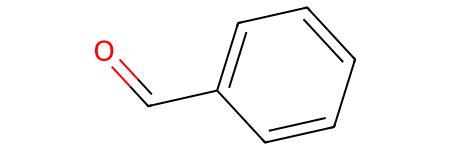

In [3]:
m

In [4]:
# almost same molecule
m1 = Chem.MolFromSmiles("c1ccccc1C(=O)")

In [5]:
# completely different molecule
cdm = Chem.MolFromSmiles("c1ccccc1C(=O)CCC1CC1")

In [6]:
# compare
print(Chem.MolToSmiles(m), Chem.MolToSmiles(m1))
# with
print(Chem.MolToSmiles(m, canonical=False), Chem.MolToSmiles(m1, canonical=False))
# Do you remember from lectures what canonical means?

O=Cc1ccccc1 O=Cc1ccccc1
C(=O)c1ccccc1 c1ccccc1C=O


In [7]:
print(Chem.MolToMolBlock(m))


     RDKit          2D

  8  8  0  0  0  0  0  0  0  0999 V2000
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  1  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  7  1  0
  7  8  2  0
  8  3  1  0
M  END



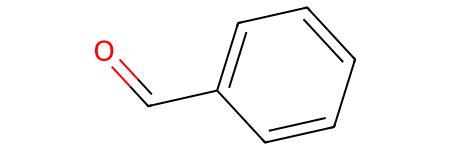

In [8]:
# rdkit can show your molecule (since 2019 without any manually added methods)
m

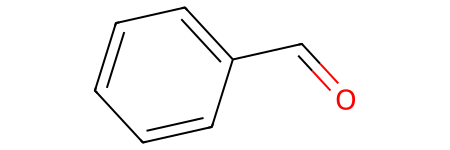

In [9]:
# looks almost the same, but different atom numbering
m1

## How to calculate all rings in drug bank?
Firstly, how can we work with rings

In [10]:
ri=m.GetRingInfo()
ri.AtomRings()

((2, 7, 6, 5, 4, 3),)

In [11]:
# can you see different ids of atoms in the ring?
ri=m1.GetRingInfo()
ri.AtomRings()

((0, 5, 4, 3, 2, 1),)

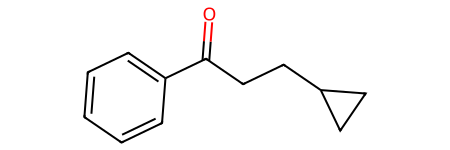

In [12]:
# advanced molecule
cdm

In [13]:
# SSSR = smallest set of smallest rings
Chem.GetSSSR(m), Chem.GetSSSR(m1), Chem.GetSSSR(cdm)

(<rdkit.rdBase._vectclass std::vector<int,class std::allocator<int> > at 0x1574ad58840>,
 <rdkit.rdBase._vectclass std::vector<int,class std::allocator<int> > at 0x1574ad59740>,
 <rdkit.rdBase._vectclass std::vector<int,class std::allocator<int> > at 0x1574ace33c0>)

In [14]:
import warnings
warnings.filterwarnings('ignore')
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')  # Default working directory is where the notebook is
drugs = [m for m in suppl if not m == None]  # supplier sometimes returns None, you can see many errors below


In this sdf file we have all available drugs in drug bank in sth about 2020.

In [25]:
len(drugs)

7120

You can see some information:

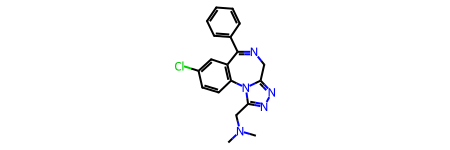

In [15]:
drugs[432]

Let's calculate descriptors.

In [17]:
from rdkit.Chem import Descriptors
weights = [Descriptors.MolWt(m) for m in drugs]
print(weights)

[2180.316999999999, 1269.4329999999984, 1069.2379999999998, 1431.0640000000005, 1202.634999999999, 1040.2399999999996, 1019.2609999999996, 247.14299999999997, 1356.395999999999, 445.4360000000003, 155.157, 399.45300000000026, 88.062, 165.19199999999998, 244.31599999999992, 104.173, 146.19000000000003, 174.20400000000004, 176.124, 202.34599999999992, 133.103, 132.16300000000004, 146.146, 347.22400000000016, 278.43600000000004, 105.093, 149.215, 181.191, 416.6460000000002, 568.8860000000003, 240.30599999999998, 118.088, 376.3690000000001, 221.20899999999997, 147.13, 307.3280000000001, 385.30600000000027, 75.067, 400.6470000000002, 167.16400000000002, 131.135, 131.17499999999998, 204.229, 121.16100000000002, 265.36199999999997, 396.6590000000003, 306.49, 175.18800000000002, 119.11999999999999, 665.4459999999999, 441.4040000000003, 302.45799999999997, 89.09400000000001, 117.148, 286.45900000000006, 430.71700000000027, 169.17999999999998, 206.33199999999997, 131.17499999999998, 294.30700000